# 重製：用机器学习判定红楼梦后40回是否曹雪芹所写

最近有篇 [文章](https://zhuanlan.zhihu.com/p/21421723) 在知乎上十分受歡迎



In [73]:
import jieba
import pandas as pd
import numpy as np

讀取從維基文庫爬蟲下來的紅樓夢，並做分詞處理

In [3]:
corpus = []
for i in range(120):
    with open("data/chapter_%s.txt" % (i+1), "r") as f:
        text = f.read().decode("utf8").replace("\n", "")
    l = jieba.lcut(text)
    cutted_text = " ".join(l)
    corpus.append(cutted_text)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.423 seconds.
DEBUG:jieba:Loading model cost 0.423 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [68]:
print corpus[5]

　 　 第六回 　 賈寶玉 初試 雲 雨情 　 劉 姥姥 一進 榮國府 　 　 題 曰 ：   　 　 　 　 朝 叩富 兒門 ， 富兒 猶未足 。 　 　 雖 無 千金 酬 ， 嗟彼勝 骨肉 。 　 　 卻 說 秦氏 因 聽 見 寶玉 從 夢 中喚 他 的 乳名 ， 心中 自是 納悶 ， 又 不好 細問 。 彼時 寶玉迷 迷惑 惑 ， 若有所失 。 眾人忙 端 上桂圓 湯來 ， 呷 了 兩口 ， 遂 起身 整衣 。 襲人 伸手 與 他 系褲 帶時 ， 不覺 伸手 至 大腿 處 ， 只覺 冰涼 一片 沾濕 ， 唬 的 忙 退出 手來 ， 問是 怎麼 了 。 寶玉紅漲 了 臉 ， 把 他 的 手 一 捻 。 襲人本 是 個 聰明 女子 ， 年紀本 又 比寶玉大 兩歲 ， 近來 也 漸通 人事 ， 今見 寶玉 如此 光景 ， 心中 便 覺察 一半 了 ， 不覺 也 羞 的 紅漲 了 臉面 ， 不敢 再問 。 仍 舊理 好 衣裳 ， 遂 至 賈母 處來 ， 胡亂 吃 畢 了 晚飯 ， 過這邊 來 。 　 　 襲人忙 趁眾 奶娘 丫鬟 不 在 旁時 ， 另 取出 一件 中衣來 與 寶玉換 上 。 寶玉 含羞 央告 道 ： “ 好 姐姐 ， 千萬別 告訴 人 。 ” 襲人 亦 含羞 笑 問道 ： “ 你夢見 什麼 故事 了 ？ 是 那里 流出 來 的 那些 髒 東 西 ？ ” 寶玉道 ： “ 一言難 盡 。 ” 說 著 便 把 夢 中 之事細 說 與 襲人 聽 了 。 然后 說 至 警幻 所 授雲雨 之情 ， 羞 的 襲人 掩面 伏身 而 笑 。 寶玉亦素 喜襲 人 柔媚 嬌俏 ， 遂 強襲 人同 領警 幻所 訓雲雨 之事 。 襲人素 知 賈母 已將 自己 與 了 寶玉 的 ， 今便 如此 ， 亦 不 為 越禮 ， 遂 和 寶玉 偷試 一番 ， 幸得 無人 撞 見 。 自此 寶玉視 襲人 更 比別 個 不同 ， 襲人待 寶玉 更 為 盡心 。 暫且 別無話 說 。 　 　 按榮府 中 一宅 人 合算 起來 ， 人口 雖不多 ， 從 上 至 下 也 有 三四百 丁 ， 雖事 不 多 ， 一天 也 有 一二十件 ， 竟如亂 麻 一般 ， 并 無個 頭緒 可作 綱領 。 正尋思 從 那 一件 事自 那 一個 人 寫 起 方妙 ， 恰好 忽 從 千里 之外 ， 芥 荳 之 微 ， 小

偷懶用 CountVectorizer 找出詞出現次數，記得 token_pattern 要改，否則單個字的詞會被忽略

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, token_pattern=r'(?u)\b\w+\b')

In [70]:
X = vectorizer.fit_transform(corpus)

In [71]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
X.shape

(120, 54723)

In [74]:
df = pd.DataFrame({"term":vectorizer.get_feature_names(), "occurrences": np.asarray(X.sum(axis=0)).ravel().tolist()})

In [75]:
sorted_df = df.sort_values("occurrences", ascending=False)

In [85]:
top310_df = sorted_df[:310]
top310_df

,occurrences,term
3048,19739,了
35128,14931,的
44711,8031,說
22680,6945,我
49015,6274,道
4101,6134,他
5062,6106,你
2984,5729,也
26858,5628,是
10294,4938,又


In [202]:
# 把這裡的結果存下來了，如果要完整重現我的過程，應該載入 top310terms.csv 繼續分析
# top310_df.term.to_csv("top310terms.csv", encoding="utf8", index=False)

人工篩選掉人名相關的詞，刪掉的詞存在 removed_words.txt

In [91]:
removed_words = []
with open("removed_words.txt", "r") as f:
    for line in f.readlines():
        removed_words.append(line.strip().decode("utf8"))

In [203]:
print " ".join(removed_words)

寶玉 賈母 鳳姐 王夫人 老太太 寶釵 賈璉 襲人 平兒 黛玉 寶玉道 探春 薛姨媽 賈政 李 賈珍 晴雯 鳳姐兒 湘云 姥姥 二爺 邢夫人 林黛玉 香菱 寶玉笑 紫鵑 尤氏 劉 趙 薛蟠 賈赦 賈蓉


In [95]:
feature_words = set(top310_df.term.tolist())- set(removed_words)

In [96]:
len(feature_words)

278

第二個 Vectorizer 只用這 278 個詞當特徵

In [109]:
vectorizer2 = CountVectorizer(min_df=1, vocabulary=feature_words)

In [110]:
X2 = vectorizer2.fit_transform(corpus)

In [113]:
tdm = X2.toarray()

In [114]:
tdm.shape

(120, 278)

## 降維做視覺化

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [115]:
pca.fit(tdm)

PCA(copy=True, n_components=3, whiten=False)

In [117]:
tdm_3d = pca.transform(tdm)

In [142]:
%matplotlib notebook

In [155]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


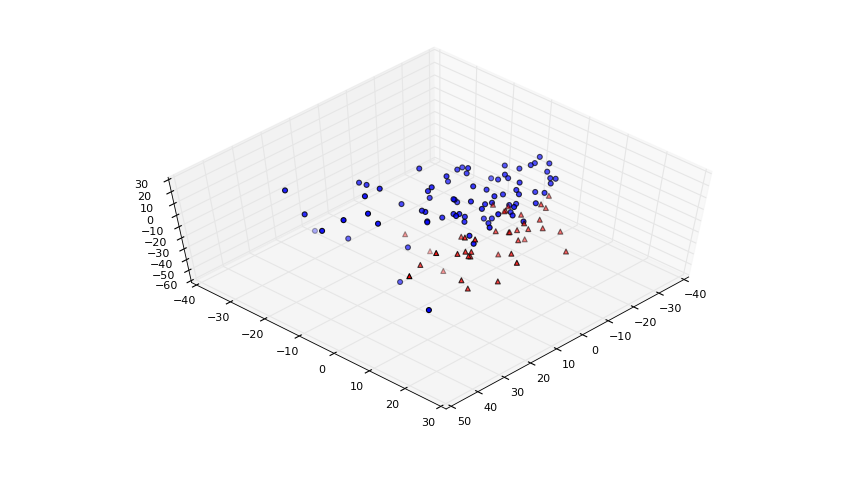

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [157]:
for color, marker, points in [["b", "o", tdm_3d[:80].T], ["r", "^", tdm_3d[80:120].T]]:
    x, y, z = points
    ax.scatter3D(x, y, z, c= color, marker = marker)

## 隨機抽取 15 章

In [178]:
from random import sample, seed

In [181]:
seed(5566)
first80 = sorted(sample(range(80), 15))
last40 = sorted(sample(range(80,120), 15))

In [182]:
first80

[1, 5, 8, 9, 12, 18, 22, 28, 31, 35, 39, 45, 50, 52, 59]

In [183]:
last40

[83, 87, 92, 98, 101, 103, 106, 108, 109, 113, 115, 116, 117, 118, 119]

In [186]:
sampled_chapters = first80 +last40

In [187]:
x_train = tdm[sampled_chapters]
x_train.shape

(30, 278)

In [189]:
y_train = [0 for i in range(15)] + [1 for i in range(15)]
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [191]:
from sklearn import svm

In [192]:
clf = svm.LinearSVC()

In [193]:
clf.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [195]:
result = clf.predict(tdm)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [199]:
first80_correct = sum([ i ==0 for i in  result[:80]])
print "前八十回正確預測： %s 章，正確率 %s" % (first80_correct, float(first80_correct)/80)

前八十回正確預測： 78 章，正確率 0.975


In [201]:
last40_correct = sum([ i ==1 for i in  result[80:]])
print "後四十回正確預測： %s 章，正確率 %s" % (last40_correct, float(last40_correct)/40)

後四十回正確預測： 39 章，正確率 0.975
